# Plant Disease Prediction

## Importing libraries

In [36]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image preprocessing

In [37]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [38]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [39]:
from tensorflow.keras.layers import Dense,Conv2D,Dropout,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential

In [40]:
cnn= Sequential()

### Building Convolution Layer

In [41]:
cnn.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(MaxPool2D(pool_size=2,strides=2))

In [42]:
cnn.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [43]:
cnn.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(MaxPool2D(pool_size=2,strides=2))

In [44]:
cnn.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(MaxPool2D(pool_size=2,strides=2))

In [45]:
cnn.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(MaxPool2D(pool_size=2,strides=2))

In [46]:
cnn.add(Dropout(0.25))

In [47]:
cnn.add(Flatten())

In [48]:
cnn.add(Dense(units=1500,activation='relu'))

In [49]:
cnn.add(Dropout(0.4)) #To avoid overfitting

In [50]:
#Output Layer
cnn.add(Dense(units=38,activation='softmax'))

### Compiling and Training Phase

In [51]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [52]:
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 126, 126, 32)      9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 63, 63, 64)        18496     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 61, 61, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 30, 30, 128)      

In [53]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 273s 120ms/step - loss: 1.4314 - accuracy: 0.5767 - val_loss: 0.5428 - val_accuracy: 0.8305
Epoch 2/10
2197/2197 [==============================] - 257s 117ms/step - loss: 0.4700 - accuracy: 0.8501 - val_loss: 0.3150 - val_accuracy: 0.8959
Epoch 3/10
2197/2197 [==============================] - 260s 118ms/step - loss: 0.2730 - accuracy: 0.9117 - val_loss: 0.2284 - val_accuracy: 0.9268
Epoch 4/10
2197/2197 [==============================] - 261s 119ms/step - loss: 0.1832 - accuracy: 0.9396 - val_loss: 0.1953 - val_accuracy: 0.9374
Epoch 5/10
2197/2197 [==============================] - 268s 122ms/step - loss: 0.1401 - accuracy: 0.9549 - val_loss: 0.2087 - val_accuracy: 0.9325
Epoch 6/10
2197/2197 [==============================] - 263s 120ms/step - loss: 0.1089 - accuracy: 0.9655 - val_loss: 0.1376 - val_accuracy: 0.9568
Epoch 7/10
2197/2197 [==============================] - 261s 119ms/step - loss: 0.0877 - accuracy: 0.9715 - val_

## Evaluating Model

In [54]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 69s 31ms/step - loss: 0.0188 - accuracy: 0.9940
Training accuracy: 0.9940109252929688


In [55]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 17s 31ms/step - loss: 0.1046 - accuracy: 0.9701
Validation accuracy: 0.9700660109519958


### Saving Model

In [56]:
cnn.save('trained_model.keras')

In [57]:
training_history.history #Return Dictionary of history

{'loss': [1.4313565492630005,
  0.47000735998153687,
  0.2730008363723755,
  0.18322744965553284,
  0.1401491016149521,
  0.10886190831661224,
  0.08768664300441742,
  0.0748719647526741,
  0.0646626427769661,
  0.05491090938448906],
 'accuracy': [0.5767266750335693,
  0.850088894367218,
  0.911657989025116,
  0.9395974278450012,
  0.9548616409301758,
  0.9655167460441589,
  0.9714915752410889,
  0.9756597280502319,
  0.9795860052108765,
  0.9817625880241394],
 'val_loss': [0.542772650718689,
  0.3149743378162384,
  0.22836188971996307,
  0.19525928795337677,
  0.20872721076011658,
  0.1375657320022583,
  0.15314824879169464,
  0.18379056453704834,
  0.09459300339221954,
  0.10456817597150803],
 'val_accuracy': [0.830525815486908,
  0.8959139585494995,
  0.926815390586853,
  0.9374004006385803,
  0.932506263256073,
  0.9568063020706177,
  0.9517983198165894,
  0.9425221681594849,
  0.9715456366539001,
  0.9700660109519958]}

In [58]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [59]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Accuracy Visualization

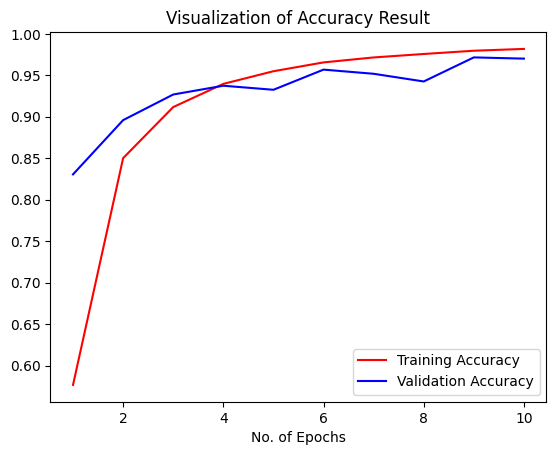

In [60]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [73]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [62]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [63]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

In [64]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [65]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [66]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [69]:
!pip install scikit-learn

In [70]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [71]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.91      0.95       504
                                 Apple___Black_rot       0.97      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.99      0.98      0.99       440
                                   Apple___healthy       0.99      0.95      0.97       502
                               Blueberry___healthy       0.98      0.98      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.99      0.99       421
                 Cherry_(including_sour)___healthy       0.98      0.98      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.93      0.93      0.93       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.96      0.

### Confusion Matrix Visualization

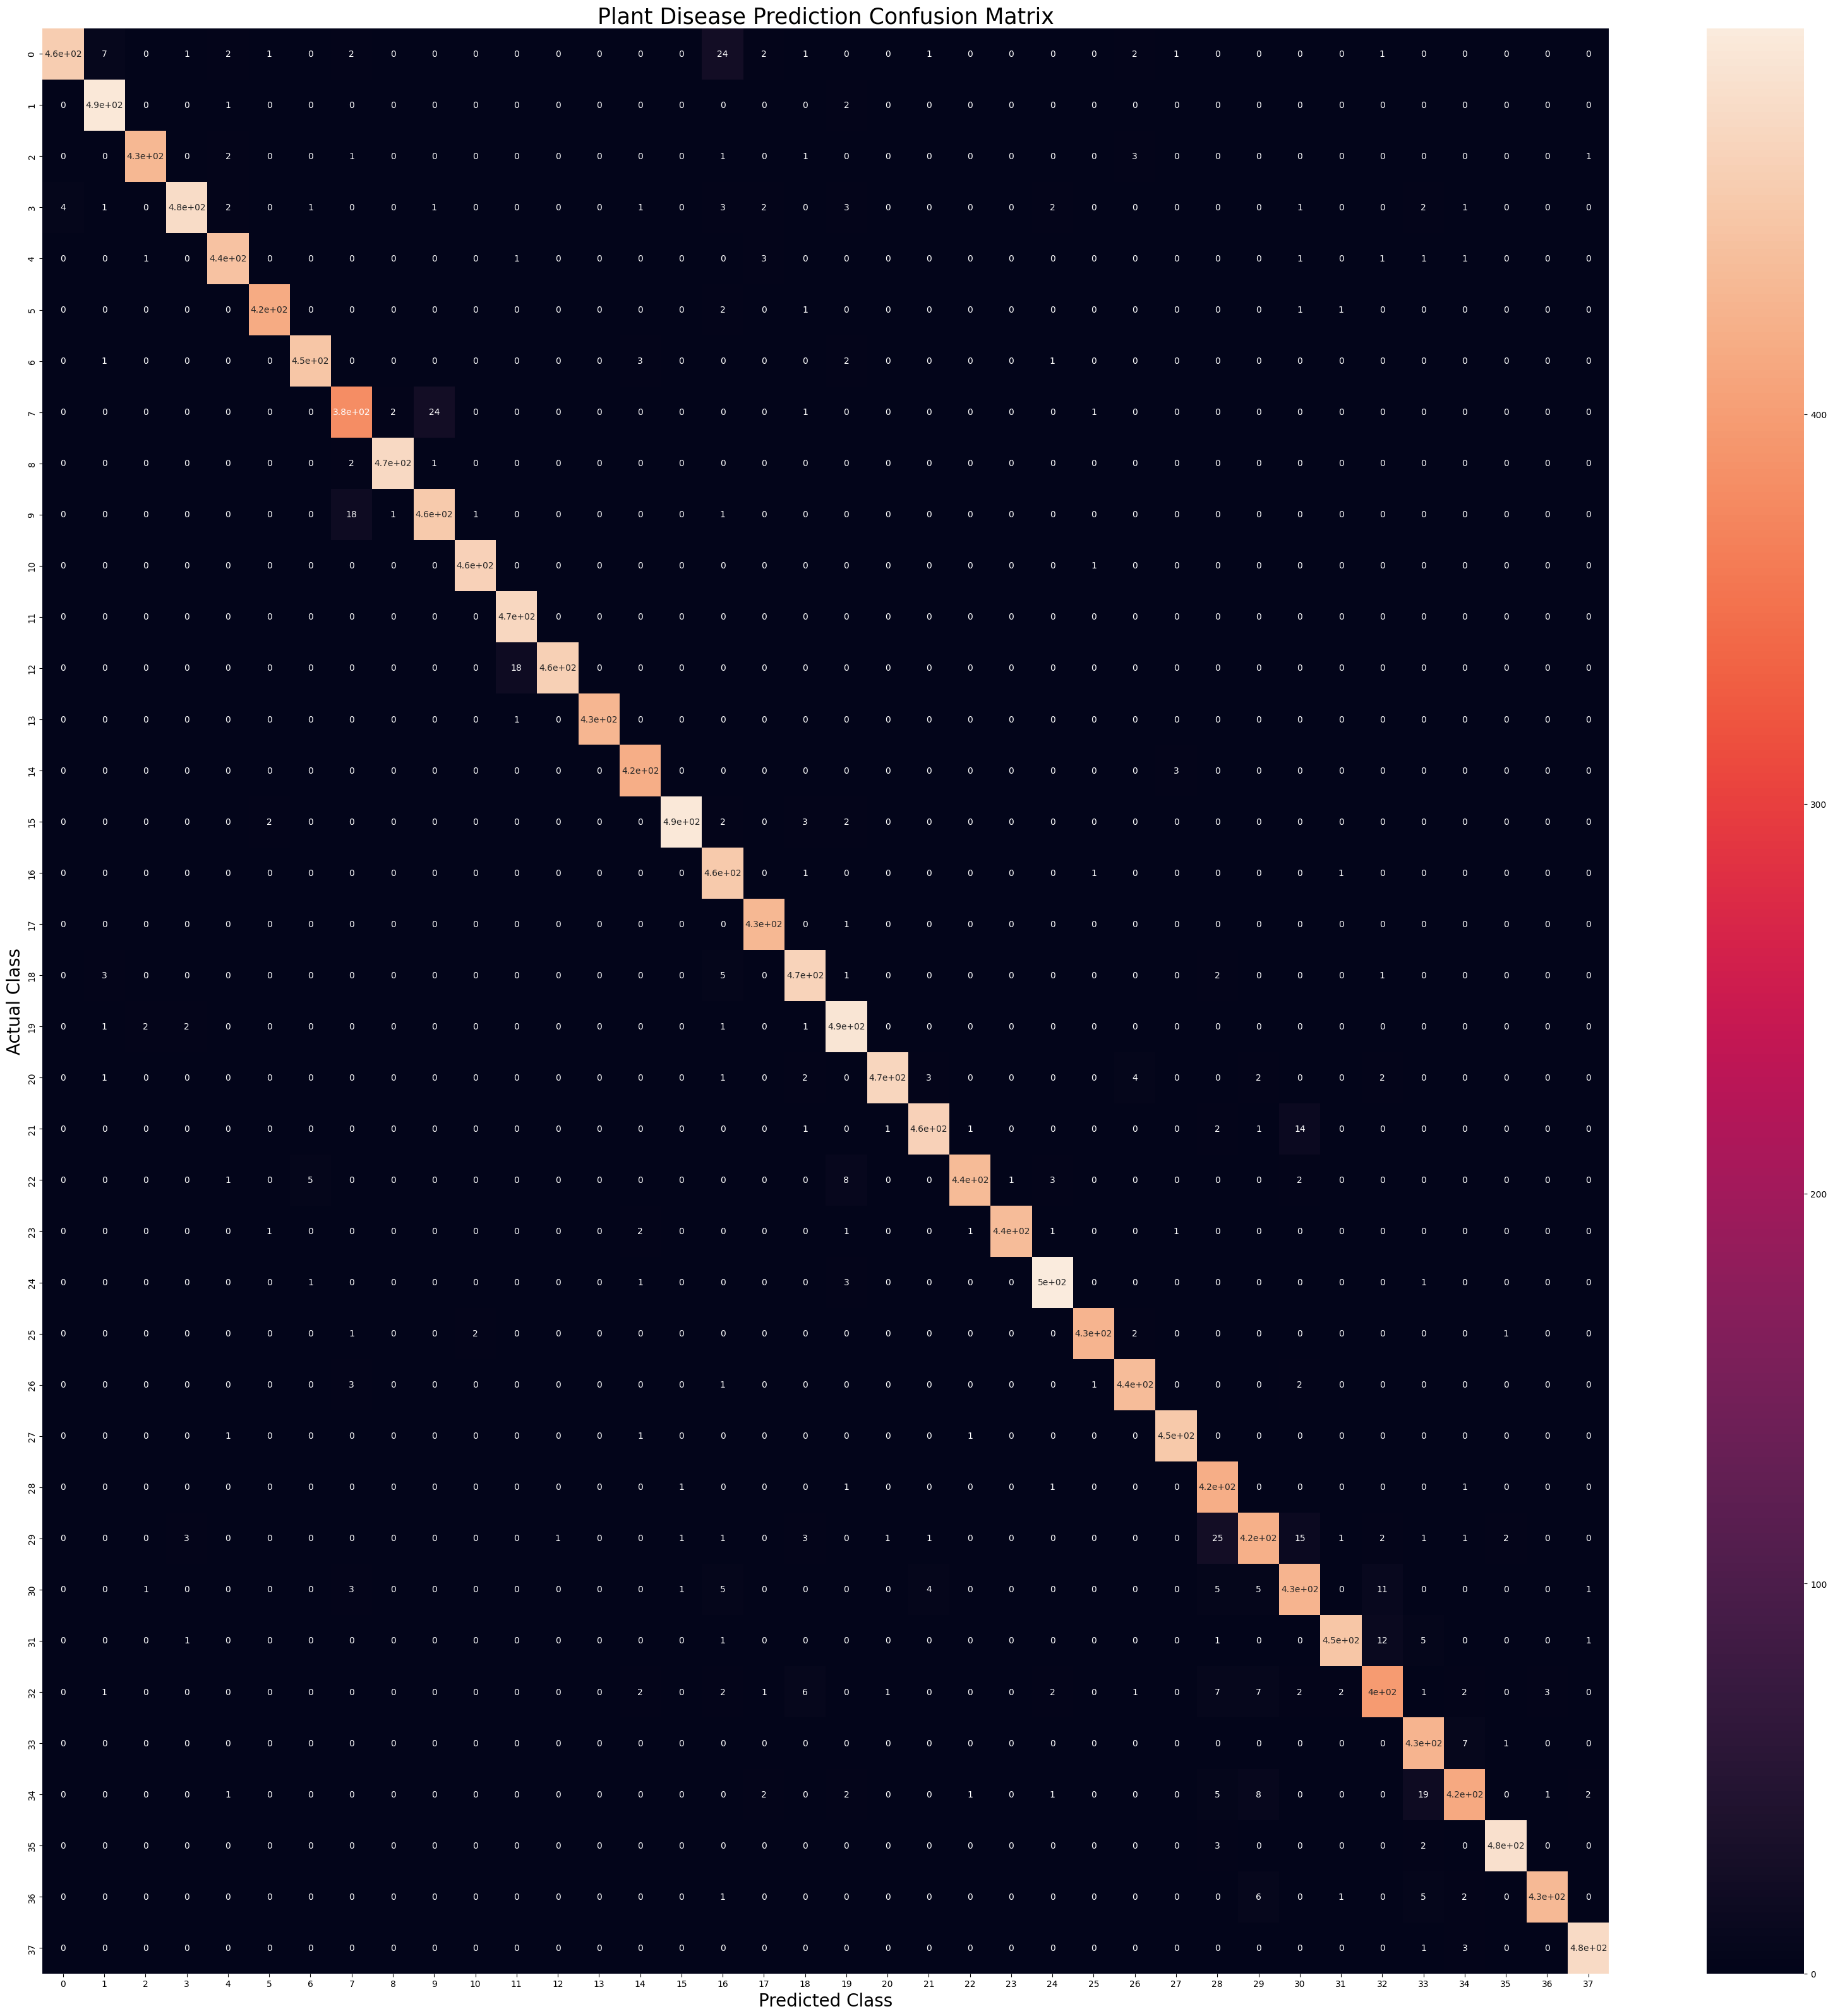

In [72]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()